In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
import seaborn as sns
from openai import OpenAI

In [12]:
df = pd.read_excel(r"C:\Users\Dnin\Desktop\bidnet_dataset_02122024_V1.xlsx")
df.head()

,Title,Description,Tags,Relevant?,Remarks
0,"E-Rate Cat. 2 - Wireless Network, UPS units, D...",The Denver Public Library (DPL) is seeking pro...,None,No,NaN
1,009-24 RFP Interpretation and Translation Serv...,DCSD is requesting proposals from qualified fi...,None,No,NaN
2,Survive and Thrive: Application and Payment Pr...,Boulder County Department of Housing and Human...,None,No,NaN
3,Parking Garage & Parking Lot Security Services,The City of Colorado Springs Parking System En...,None,No,NaN
4,Eaton UPS Replacements FY24,The University of Northern Colorado (“Universi...,None,No,NaN


In [13]:
df['Description'] = df['Title'].fillna('') + ' - ' + df['Description'].fillna('')

df['Relevant?'] = df['Relevant?'].map({'Yes': True, 'No': False}).astype(bool)

df['Tags'] = df['Tags'].apply(lambda x:[tag.strip() for tag in x.split(',')] if x != "None" else [])

In [3]:
df = df.loc[130:]

In [14]:
client = OpenAI(api_key="...")
model = "gpt-3.5-turbo-0125"

In [15]:
def chatGPTResponse(row, model):
    description = row['Description']
    completion = client.chat.completions.create(
      model=model,
      messages=[
        {"role": "system", "content": "Your job is to find if a particular description matches a set of keywords. These descriptions are RFP that are fetched from a portal. Our company needs to decide if an RFP is relevant based on the following keywords.\
                 The Keywords are digital transformation, artificial intelligence, machine learning, analytics, data engineering,\
                salesforce, grants, licensing, permits, lightning experience, lightning migration,\
                case management, data warehouse, automation, rpa, robotic process automation, advisory,\
               application development, document management, apex, visualforce, einstein analytics, tableau, power bi, crm \
               Your response will be precise and you will only respond with the keyword the description matches the most with. \
               If it does not match with any keyword just respond with 'No'.\
               You should not miss even a single relevant RFP, even if the relevance score is somewhat low. We are ok with extra unwanted RFP's, but if you feel like a RFP could be even slightly relevant based on the keyword, you will match it."},
        {"role": "user", "content": f"Description - {description}"}
      ]
    )
    response = completion.choices[0].message.content
    tokens_used = completion.usage.total_tokens
    return response, tokens_used

def check_relevance(row):
    relevance = False if row['Relevant Tags'] == 'No' else True
    return relevance

In [7]:
# print("Response:" ,completion.choices[0].message.content)
# print("Tokens Used:" ,completion.usage.total_tokens)

In [16]:
df[['Relevant Tags','Tokens']] = df.apply(lambda row: chatGPTResponse(row,model), axis=1,result_type='expand')

In [17]:
total_tokens_used = df['Tokens'].sum()
cost = (total_tokens_used/1000) * 0.0005
print(cost)

0.023172


In [18]:
df['Predicted Relevance'] = df.apply(check_relevance, axis=1)

In [19]:
precision = precision_score(df['Relevant?'], df['Predicted Relevance'])
recall = recall_score(df['Relevant?'], df['Predicted Relevance'])
accuracy = accuracy_score(df['Relevant?'], df['Predicted Relevance'])

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8571428571428571
Recall: 0.6923076923076923
Accuracy: 0.9153846153846154


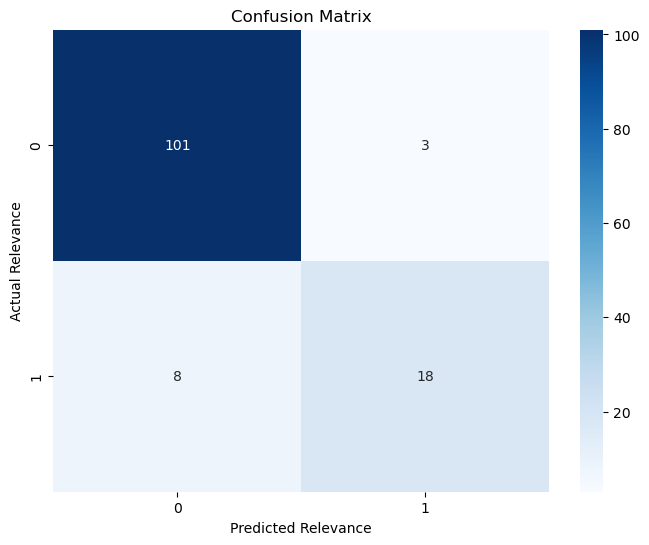

In [22]:
conf_mat = confusion_matrix(df['Relevant?'], df['Predicted Relevance'])
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Relevance')
plt.ylabel('Actual Relevance')
plt.show()

In [21]:
df[:30]

,Title,Description,Tags,Relevant?,Remarks,Relevant Tags,Tokens,Predicted Relevance
0,"E-Rate Cat. 2 - Wireless Network, UPS units, D...","E-Rate Cat. 2 - Wireless Network, UPS units, D...",[],False,NaN,No,329,False
1,009-24 RFP Interpretation and Translation Serv...,009-24 RFP Interpretation and Translation Serv...,[],False,NaN,No,337,False
2,Survive and Thrive: Application and Payment Pr...,Survive and Thrive: Application and Payment Pr...,[],False,NaN,No,260,False
3,Parking Garage & Parking Lot Security Services,Parking Garage & Parking Lot Security Services...,[],False,NaN,No,273,False
4,Eaton UPS Replacements FY24,Eaton UPS Replacements FY24 - The University o...,[],False,NaN,No,262,False
5,Enterprise Resource Planning Readiness Consultant,Enterprise Resource Planning Readiness Consult...,[automation],True,Its not relevant but its okay if its classifie...,No,355,False
6,NaN,- The District seeks to gather information on...,[],False,NaN,No,299,False
7,Electronic Case Management for City Prosecutor...,Electronic Case Management for City Prosecutor...,[case management],True,NaN,Case Management,283,True
8,Software and Implementation Services for an En...,Software and Implementation Services for an En...,[],False,NaN,No,314,False
9,BD2429: Digital Adoption Platform (DAP),BD2429: Digital Adoption Platform (DAP) - Digi...,[digital transformation],True,NaN,Licensing,274,True


In [25]:
df.loc[(df['Relevant?'] == True) & (df['Predicted Relevance'] == False)]

,Title,Description,Tags,Relevant?,Remarks,Relevant Tags,Tokens,Predicted Relevance
5,Enterprise Resource Planning Readiness Consultant,Enterprise Resource Planning Readiness Consult...,[automation],True,Its not relevant but its okay if its classifie...,No,355,False
14,UI Fraud Detection and Prevention Services-MyUI+,UI Fraud Detection and Prevention Services-MyU...,[analytics],True,NaN,No,512,False
15,"FAMLI PREMIUMS, BENEFITS AND DMS SYSTEM IMPLEM...","FAMLI PREMIUMS, BENEFITS AND DMS SYSTEM IMPLEM...","[digital transformation, document management]",True,NaN,No,471,False
16,Consulting Services for UI Division Process Im...,Consulting Services for UI Division Process Im...,"[rpa, robotic process automation, analytics, d...",True,NaN,No,437,False
24,"RFP# 1173 - Website Monitoring, Support, and D...","RFP# 1173 - Website Monitoring, Support, and D...",[application development],True,NaN,No,361,False
41,"Inventory, Recipe, and Menu Management Software","Inventory, Recipe, and Menu Management Softwar...","[data warehouse, application development]",True,NaN,No,304,False
46,Enterprise Resource Planning Readiness Consultant,Enterprise Resource Planning Readiness Consult...,[application development],True,NaN,No,356,False
120,Modified - Financial Mmgt Service Provider - H...,Modified - Financial Mmgt Service Provider - H...,[data engineering],True,NaN,No,397,False
